# Google Drive Import Dataset

In [ ]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Recreate Train, Test, Val folder

In [ ]:
downloaded = drive.CreateFile({'id':"1DchHTqcAefxyondZrtC939cI5I4zM9T0"}) #1DchHTqcAefxyondZrtC939cI5I4zM9T0 trashnet.zip
downloaded.GetContentFile('Trashnet.zip') #file.zip
!unzip Trashnet.zip #file.zip

In [ ]:
os.listdir(os.path.join(os.getcwd(),"dataset-resized"))

['trash', 'plastic', 'glass', '.DS_Store', 'paper', 'cardboard', 'metal']

In [ ]:
def split_indices(folder,seed1,seed2):    
    n = len(os.listdir(folder))
    full_set = list(range(1,n+1))

    ## train indices
    random.seed(seed1)
    train = random.sample(list(range(1,n+1)),int(.8*n))

    ## temp
    remain = list(set(full_set)-set(train))

    ## separate remaining into validation and test
    random.seed(seed2)
    valid = random.sample(remain,int(.5*len(remain)))
    test = list(set(remain)-set(valid))
    
    return(train,valid,test)

## gets file names for a particular type of trash, given indices
    ## input: waste category and indices
    ## output: file names 
def get_names(waste_type,indices):
    file_names = [waste_type+str(i)+".jpg" for i in indices]
    return(file_names)    

## moves group of source files to another folder
    ## input: list of source files and destination folder
    ## no output
def move_files(source_files,destination_folder):
    for file in source_files:
        shutil.move(file,destination_folder)

In [ ]:
## paths will be train/cardboard, train/glass, etc...
subsets = ['train','valid', 'test']
waste_types = ['cardboard','glass','metal','paper','plastic','trash']

## create destination folders for data subset and waste type
for subset in subsets:
    for waste_type in waste_types:
        folder = os.path.join('data',subset,waste_type)
        if not os.path.exists(folder):
            os.makedirs(folder)
            
## move files to destination folders for each waste type

for waste_type in waste_types:
    source_folder = os.path.join('dataset-resized',waste_type)
    train_ind, valid_ind, test_ind = split_indices(source_folder,1,1)
    
    ## move source files to train
    train_names = get_names(waste_type,train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    train_dest = "data/train/"+waste_type
    move_files(train_source_files,train_dest)
    
    ## move source files to valid
    valid_names = get_names(waste_type,valid_ind)
    valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
    valid_dest = "data/valid/"+waste_type
    move_files(valid_source_files,valid_dest)
    
    ## move source files to test
    test_names = get_names(waste_type,test_ind)
    test_source_files = [os.path.join(source_folder,name) for name in test_names]
    ## I use data/test here because the images can be mixed up
    test_dest = "data/test/"+waste_type
    move_files(test_source_files,test_dest)

In [ ]:
!zip -r /content/datafinal.zip /content/data

  adding: content/data/ (stored 0%)
  adding: content/data/test/ (stored 0%)
  adding: content/data/test/trash/ (stored 0%)
  adding: content/data/test/trash/trash104.jpg (deflated 5%)
  adding: content/data/test/trash/trash82.jpg (deflated 1%)
  adding: content/data/test/trash/trash40.jpg (deflated 4%)
  adding: content/data/test/trash/trash131.jpg (deflated 7%)
  adding: content/data/test/trash/trash125.jpg (deflated 4%)
  adding: content/data/test/trash/trash136.jpg (deflated 4%)
  adding: content/data/test/trash/trash122.jpg (deflated 8%)
  adding: content/data/test/trash/trash100.jpg (deflated 3%)
  adding: content/data/test/trash/trash92.jpg (deflated 3%)
  adding: content/data/test/trash/trash42.jpg (deflated 2%)
  adding: content/data/test/trash/trash133.jpg (deflated 7%)
  adding: content/data/test/trash/trash23.jpg (deflated 2%)
  adding: content/data/test/trash/trash81.jpg (deflated 3%)
  adding: content/data/test/trash/trash61.jpg (deflated 1%)
  adding: content/data/test/p

# Imports

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
import seaborn as sns
from pathlib import Path
from glob2 import glob
from sklearn.metrics import confusion_matrix
import random
import matplotlib.pyplot as plt
import matplotlib.image as imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Setup




In [ ]:
datafinal = drive.CreateFile({'id':"1a1D5guzmQgg_CLmoBZhBXx0I6H4YXq1n"}) #1a1D5guzmQgg_CLmoBZhBXx0I6H4YXq1n
datafinal.GetContentFile('datafinal.zip') #file.zip
!unzip datafinal.zip #file.zip

In [ ]:
folder_path = '/content/content/data'
test_path = folder_path + "/test/"
train_path = folder_path + "/train/"
valid_path = folder_path + "/valid/"

In [ ]:
os.listdir(train_path)

['trash', 'plastic', 'glass', 'paper', 'cardboard', 'metal']

(384, 512, 3)


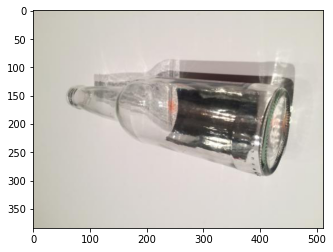

In [ ]:
glass_img_path = train_path + '/glass/' + os.listdir(train_path+'/glass/')[0]
glass_img = plt.imread(glass_img_path)
plt.imshow(glass_img)
print(glass_img.shape)

(384, 512, 3)


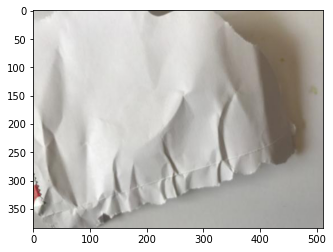

In [ ]:
paper_img_path = train_path + '/paper/' + os.listdir(train_path+'/paper/')[0]
paper_img = plt.imread(paper_img_path)
plt.imshow(paper_img)
print(paper_img.shape)

(384, 512, 3)


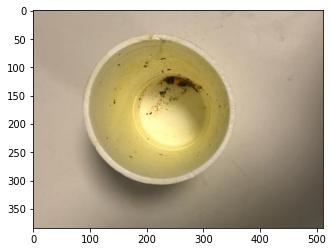

In [ ]:
trash_img_path = train_path + '/trash/' + os.listdir(train_path+'/trash/')[0]
trash_img = plt.imread(trash_img_path)
plt.imshow(trash_img)
print(trash_img.shape)

(384, 512, 3)


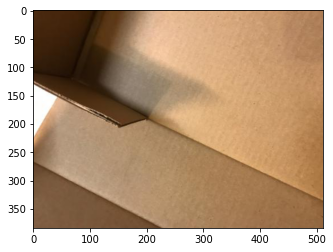

In [ ]:
cardboard_img_path = train_path + '/cardboard/' + os.listdir(train_path+'/cardboard/')[0]
cardboard_img = plt.imread(cardboard_img_path)
plt.imshow(cardboard_img)
print(trash_img.shape)

(384, 512, 3)


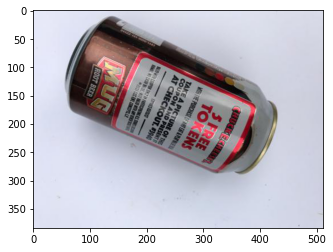

In [ ]:
metal_img_path = train_path + '/metal/' + os.listdir(train_path+'/metal/')[0]
metal_img = plt.imread(metal_img_path)
plt.imshow(metal_img)
print(metal_img.shape)

(384, 512, 3)


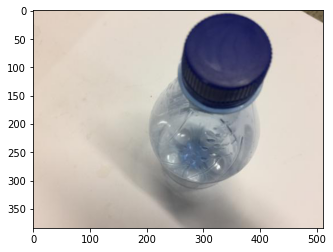

In [ ]:
plastic_img_path = train_path + '/plastic/' + os.listdir(train_path+'/plastic/')[0]
plastic_img = plt.imread(plastic_img_path)
plt.imshow(plastic_img)
print(plastic_img.shape)

In [ ]:
print("glass: ", len(os.listdir(train_path+'/glass')))
print("paper: ", len(os.listdir(train_path+'/paper')))
print("trash: ", len(os.listdir(train_path+'/trash')))
print("cardboard: ", len(os.listdir(train_path+'/cardboard')))
print("metal: ", len(os.listdir(train_path+'/metal')))
print("plastic: ", len(os.listdir(train_path+'/plastic')))

glass:  400
paper:  475
trash:  109
cardboard:  322
metal:  328
plastic:  385


In [ ]:
image_shape = (384,512,3)

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest'
)

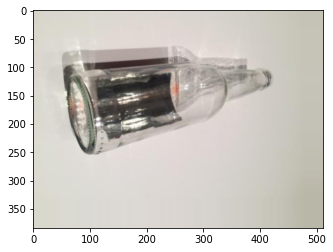

In [ ]:
plt.imshow(image_gen.random_transform(glass_img))

# Neural Network



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, ZeroPadding2D, Conv2D, Convolution2D, MaxPooling2D, MaxPool2D, BatchNormalization, GlobalMaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import adam, sgd

Using TensorFlow backend.


In [ ]:
import tensorflow 
import keras
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), padding='same',input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

filepath="trained_model_1.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 384, 512, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 192, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 192, 256, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 96, 128, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 128, 32)       18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 64, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 98304)             0

In [ ]:
batch_size = 32

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size = batch_size,
                                               class_mode='categorical', shuffle=True)

Found 2019 images belonging to 6 classes.


In [ ]:
train_image_gen.__len__()

64

In [ ]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 256 images belonging to 6 classes.


In [ ]:
test_image_gen.__len__()

8

In [ ]:
valid_image_gen = image_gen.flow_from_directory(valid_path,
                                                target_size = image_shape[:2],
                                                color_mode = 'rgb',
                                                batch_size = batch_size,
                                                class_mode='categorical',shuffle=True)

Found 252 images belonging to 6 classes.


In [ ]:
valid_image_gen.__len__()

8

In [ ]:
train_image_gen.class_indices
test_image_gen.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [ ]:
history = model.fit(train_image_gen,
                              epochs=120,
                              steps_per_epoch=2276//32,
                              validation_data=valid_image_gen,
                              validation_steps=251//32,
                              workers = 4,
                              callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5), checkpoint1]) 

Epoch 1/120
71/71 [==============================] - ETA: 0s - loss: 1.8913 - acc: 0.2296
Epoch 00001: val_acc improved from -inf to 0.21875, saving model to trained_model_1.h5
71/71 [==============================] - 105s 1s/step - loss: 1.8913 - acc: 0.2296 - val_loss: 1.7040 - val_acc: 0.2188
Epoch 2/120
71/71 [==============================] - ETA: 0s - loss: 1.6290 - acc: 0.3206
Epoch 00002: val_acc improved from 0.21875 to 0.34821, saving model to trained_model_1.h5
71/71 [==============================] - 105s 1s/step - loss: 1.6290 - acc: 0.3206 - val_loss: 1.4662 - val_acc: 0.3482
Epoch 3/120
71/71 [==============================] - ETA: 0s - loss: 1.5206 - acc: 0.3660
Epoch 00003: val_acc improved from 0.34821 to 0.43304, saving model to trained_model_1.h5
71/71 [==============================] - 104s 1s/step - loss: 1.5206 - acc: 0.3660 - val_loss: 1.3835 - val_acc: 0.4330
Epoch 4/120
71/71 [==============================] - ETA: 0s - loss: 1.3965 - acc: 0.4436
Epoch 00004: 

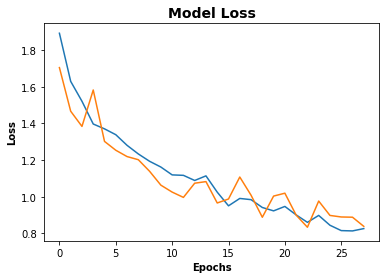

In [ ]:
losses = pd.DataFrame(history.history)
plt.figure()
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontweight='bold')
plt.ylabel('Loss', fontweight='bold')
plt.plot(losses[['loss','val_loss']])
plt.savefig('ModelLoss.png')
# losses.loc[['loss','val_loss']].plot()

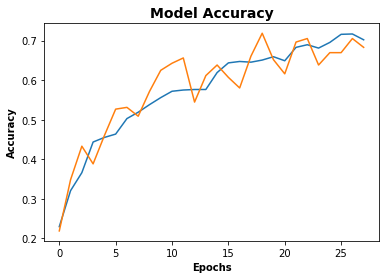

In [ ]:
accuracy = pd.DataFrame(history.history)
plt.figure()
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.plot(accuracy[['acc','val_acc']])
plt.savefig('ModelAccuracy.png')

In [ ]:
print(model.metrics_names)
print(model.evaluate(test_image_gen))

['loss', 'acc']
8/8 [==============================] - 9s 1s/step - loss: 0.9238 - acc: 0.6914
[0.9237816333770752, 0.69140625]


In [ ]:
pred_probabilities = model.predict(test_image_gen)
pred_probabilities[:5]

array([[5.63013911e-01, 1.05600640e-01, 1.13526307e-01, 3.85439768e-02,
        1.01725109e-01, 7.75899962e-02],
       [9.95180011e-01, 1.86370558e-03, 5.18828529e-05, 4.18266980e-04,
        2.06243340e-03, 4.23672667e-04],
       [7.02369928e-01, 3.26494612e-02, 2.24224374e-01, 6.55809930e-03,
        2.87554301e-02, 5.44264726e-03],
       [1.23302504e-01, 2.34419107e-02, 8.43849659e-01, 3.94786039e-04,
        8.90981033e-03, 1.01269572e-04],
       [2.85630584e-01, 1.85362063e-03, 7.04740345e-01, 2.11252575e-03,
        4.03900538e-03, 1.62385928e-03]], dtype=float32)

In [ ]:
test_image_gen.classes[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [ ]:
predictions = np.argmax(pred_probabilities, axis=1)
predictions

array([0, 0, 0, 2, 2, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 5, 1, 1,
       2, 1, 3, 3, 5, 3, 2, 1, 1, 4, 1, 1, 1, 1, 1, 4, 4, 1, 4, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 4, 1, 2, 4, 1, 1, 4, 1, 2, 1, 4, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 4, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 4, 0, 2, 2, 2, 3, 2, 2, 2, 4, 4, 2, 5, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       1, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 1, 3, 2, 4, 4,
       4, 4, 4, 3, 2, 0, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 1, 4, 4, 4, 4, 3,
       4, 4, 4, 4, 1, 4, 4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4,
       5, 1, 1, 2, 5, 3, 0, 5, 5, 5, 2, 0, 5, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.66      0.57      0.61        51
           2       0.52      0.66      0.58        41
           3       0.79      0.82      0.80        60
           4       0.70      0.71      0.71        49
           5       0.67      0.43      0.52        14

    accuracy                           0.70       256
   macro avg       0.70      0.67      0.68       256
weighted avg       0.71      0.70      0.70       256



In [ ]:
confusion_matrix(test_image_gen.classes, predictions)

array([[34,  0,  3,  1,  3,  0],
       [ 0, 29,  9,  3,  8,  2],
       [ 1,  7, 27,  1,  4,  1],
       [ 1,  2,  8, 49,  0,  0],
       [ 1,  3,  3,  7, 35,  0],
       [ 2,  3,  2,  1,  0,  6]])

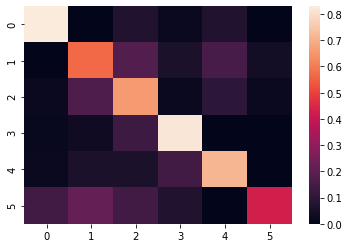

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_image_gen.classes, predictions, normalize='true'))